In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
# Data
data = {
    'Number UEs str': ['16', '32', '64', '128', '256', '512', '1024'],
    'Avg. CPU (millicores)': [0.0881, 0.013, 0.477, 0.938, 2.375, 4.275, 8.0757],
    'Std Dev CPU': [0.0324, 0.017, 0.186, 0.469, 0.703, 0.532, 2.26],  
    'Std Dev CPU': [0.011, 0.002, 0.096, 0.14, 0.38, 0.57, 1.52],
    'Avg. Memory (MB)': [45.5, 58.1, 107.83, 214.7, 366.77, 626.59, 1070.58],
    'Std Dev Memory': [3.2, 6, 8.5, 15, 25, 50, 90],
    'Time to solve (s)': [1.56, 2.55, 6.42, 20.24, 49.26, 119.95, 292.04],
    'Std Dev Time': [0.39, 0.38, 1.29, 3.24, 8.37, 14.39, 73.01]
}

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="darkgrid")

CPU Fit: 3.746*x^2 + -11.706*x + 8.998
Memory Fit: 433.237*x^2 + -1295.383*x + 1004.613


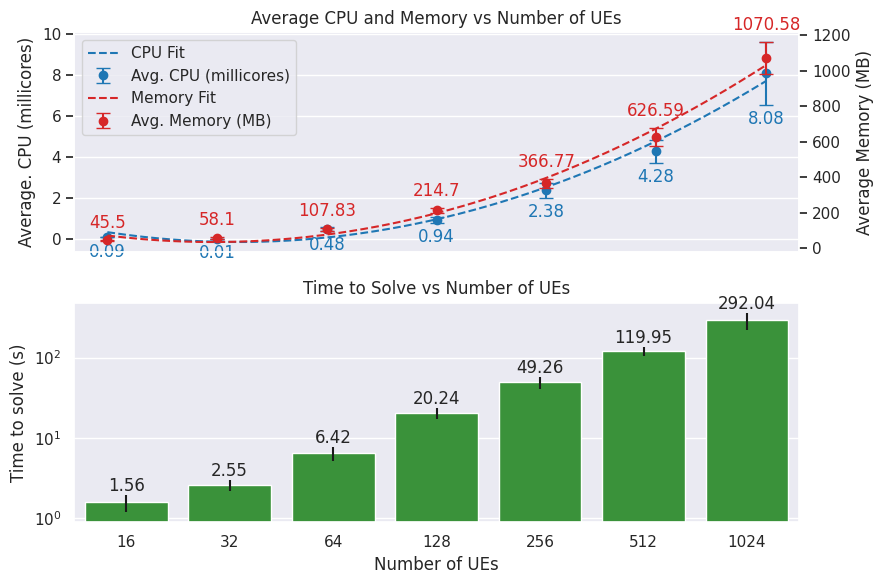

In [4]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=False)

# Line plot for Avg. CPU and Avg. Memory vs Number UEs str with two y-axes
ax1 = axs[0]
ax2 = ax1.twinx()

ax1.errorbar(df['Number UEs number'], df['Avg. CPU (millicores)'], yerr=df['Std Dev CPU'], fmt='o',capsize=5, label='Avg. CPU (millicores)', color='tab:blue')
ax2.errorbar(df['Number UEs number'], df['Avg. Memory (MB)'], yerr=df['Std Dev Memory'], fmt='o',capsize=5, label='Avg. Memory (MB)', color='tab:red')

# Fit polynomial curve
cpu_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg. CPU (millicores)'], 2)
memory_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg. Memory (MB)'], 2)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(min(df['Number UEs number']), max(df['Number UEs number']), 500)
log_x_values = np.log10(x_values)

# Calculate y values for the polynomial curve
cpu_poly_y = np.polyval(cpu_poly_coeff, log_x_values)
memory_poly_y = np.polyval(memory_poly_coeff, log_x_values)

# Print fit equations
cpu_fit_eq = f"CPU Fit: {cpu_poly_coeff[0]:.3f}*x^2 + {cpu_poly_coeff[1]:.3f}*x + {cpu_poly_coeff[2]:.3f}"
memory_fit_eq = f"Memory Fit: {memory_poly_coeff[0]:.3f}*x^2 + {memory_poly_coeff[1]:.3f}*x + {memory_poly_coeff[2]:.3f}"


print(cpu_fit_eq)
print(memory_fit_eq)

ax1.plot(x_values, cpu_poly_y, '--', color='tab:blue', label='CPU Fit')
ax2.plot(x_values, memory_poly_y, '--', color='tab:red', label='Memory Fit')

ax1.set_title('Average CPU and Memory vs Number of UEs')
ax1.set_xscale('log')
#ax1.set_xlabel('Number of UEs')
ax1.set_ylabel('Average. CPU (millicores)')
ax2.set_ylabel('Average Memory (MB)')

# Annotate the values for Avg. CPU
for i, v in enumerate(df['Avg. CPU (millicores)']):
    ax1.annotate(str(round(v, 2)), (df['Number UEs number'][i], v - df['Std Dev CPU'][i] - 0.25), ha='center', va='top', color='tab:blue')

# Annotate the values for Avg. Memory
for i, v in enumerate(df['Avg. Memory (MB)']):
    ax2.annotate(str(round(v, 2)), (df['Number UEs number'][i], v + df['Std Dev Memory'][i] + 45), ha='center', va='bottom', color='tab:red')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)
# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])
# Add legends
# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


# Line plot for Time to solve vs Number UEs str
sns.barplot(x='Number UEs str', y='Time to solve (s)', yerr=df['Std Dev Time'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Time to Solve vs Number of UEs')
axs[1].set_xlabel('Number of UEs')
axs[1].set_ylabel('Time to solve (s)')
axs[1].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time to solve (s)']):
    axs[1].annotate(str(round(v, 2)), (df['Number UEs str'][i], v + df['Std Dev Time'][i]), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/rApp-energy-saver.png', bbox_inches='tight')
plt.savefig('out/rApp-energy-saver.pdf', dpi=300, bbox_inches='tight')
plt.show()